<a href="https://colab.research.google.com/github/khykelly-cloud/mul/blob/main/Savings_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

customer = pd.read_csv("https://raw.githubusercontent.com/khykelly-cloud/mul/main/Customer.csv")
dc = pd.read_csv("https://raw.githubusercontent.com/khykelly-cloud/mul/main/DistributionCenter.csv")
truck = pd.read_csv("https://raw.githubusercontent.com/khykelly-cloud/mul/main/Truck.csv")

print(customer.head())
print(dc.head())
print(truck.head())


    X   Y  DEMAND
0  37  52       7
1   9  49      30
2   2  64      16
3   0  26       9
4   0  30      21
    X   Y  CAPACITY  COST
0  30  46     10000    40
1  37  39     10000    40
2  23  43     10000    40
3  56  38     10000    40
4  42  43     10000    40
   CAPACITY
0       160


In [2]:
customer['DEMAND'].sum()


np.int64(777)

In [5]:
import matplotlib.pyplot as plt


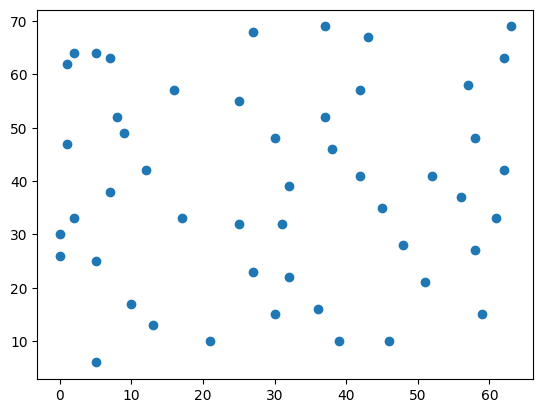

In [6]:
plt.scatter(customer['X'], customer['Y'])


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


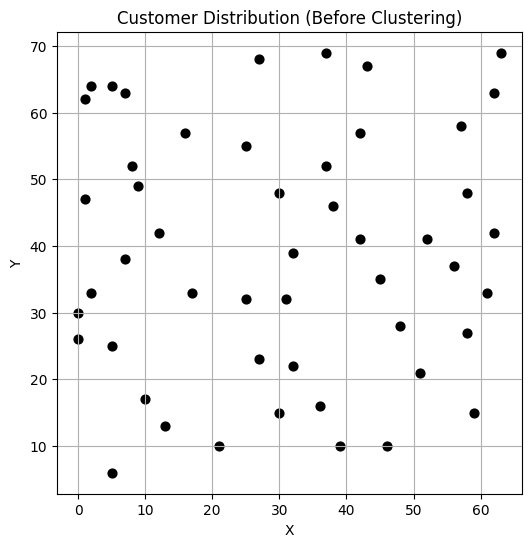

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(customer['X'], customer['Y'], c='black', s=40)
plt.title("Customer Distribution (Before Clustering)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [10]:
k = 3  # 실험하면서 바꿔도 됨
kmeans = KMeans(n_clusters=k, random_state=42)
customer['cluster'] = kmeans.fit_predict(customer[['X', 'Y']])
centers = kmeans.cluster_centers_


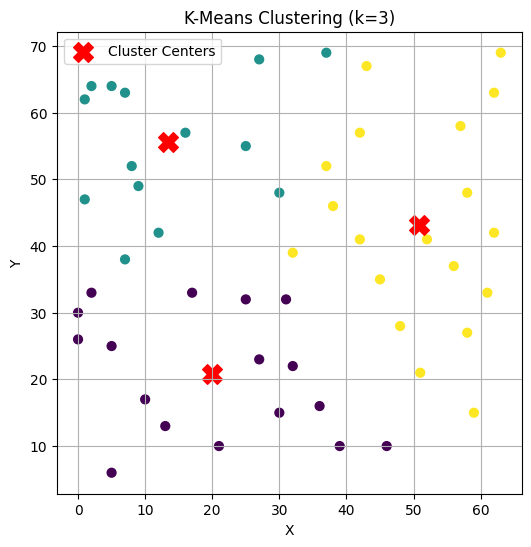

In [11]:
plt.figure(figsize=(6, 6))

# 고객 좌표 + 클러스터 색깔로 표현
plt.scatter(customer['X'], customer['Y'],
            c=customer['cluster'], cmap='viridis', s=40)

# 클러스터 중심 표시
plt.scatter(centers[:,0], centers[:,1],
            c='red', s=200, marker='X', label='Cluster Centers')

plt.title(f"K-Means Clustering (k={k})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from itertools import combinations

dc_indices = list(range(len(dc)))

all_dc_sets = []
for r in range(1, len(dc_indices)+1):
    for comb in combinations(dc_indices, r):
        all_dc_sets.append(list(comb))

len(all_dc_sets)  # → 31개


31

In [13]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.spatial.distance import cdist

# ----------------------------------------
# 데이터 로드 (이미 되어 있다면 생략)
# ----------------------------------------
# customer = pd.read_csv("Customer.csv")
# dc = pd.read_csv("DistributionCenter.csv")

num_customers = len(customer)
num_dc = len(dc)

# ----------------------------------------
# 1. 모든 DC 조합 생성 (1~5개)
# ----------------------------------------
dc_indices = list(range(num_dc))
dc_sets = []

for r in range(1, num_dc + 1):
    for comb in combinations(dc_indices, r):
        dc_sets.append(list(comb))

print(f"총 DC 조합 개수: {len(dc_sets)}개")  # → 31개


# ----------------------------------------
# 2. 각 DC 조합별 고객 배정
# ----------------------------------------

def assign_customers_to_dc(dc_list):
    """
    dc_list: 선택된 DC 번호 리스트 [0,2,4] 형태
    return: {dc_index: [고객 번호 리스트]}
    """

    # 해당 DC들의 좌표만 추출
    dc_subset = dc.loc[dc_list, ['X','Y']].values  # shape (k,2)

    # 고객-DC 거리 계산
    dist_matrix = cdist(customer[['X','Y']], dc_subset)

    # 고객마다 가장 가까운 DC 선택
    assigned_dc_idx = dist_matrix.argmin(axis=1)  # 0~len(dc_list)-1

    allocation = {dc_id: [] for dc_id in dc_list}

    for customer_idx, local_dc_idx in enumerate(assigned_dc_idx):
        real_dc_id = dc_list[local_dc_idx]  # 원래 DC 번호로 변환
        allocation[real_dc_id].append(customer_idx)

    return allocation


# ----------------------------------------
# 3. DC 조합별 배정 결과 저장
# ----------------------------------------

all_allocations = {}  # key = 조합(tuple), value = 고객 배정 dict

for dc_list in dc_sets:
    dc_key = tuple(dc_list)
    allocation = assign_customers_to_dc(dc_list)
    all_allocations[dc_key] = allocation

# 예시 출력 (앞 3개)
for i, key in enumerate(list(all_allocations.keys())[:3]):
    print(f"조합 {key} 배정 결과:")
    print(all_allocations[key])
    print("-" * 40)


총 DC 조합 개수: 31개
조합 (0,) 배정 결과:
{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}
----------------------------------------
조합 (1,) 배정 결과:
{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}
----------------------------------------
조합 (2,) 배정 결과:
{2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}
----------------------------------------


In [14]:
import math

def create_vrp_input_for_dc(dc_id, customer_list):
    """
    dc_id: 실제 DC 번호 (0~4)
    customer_list: 이 DC에 배정된 고객 인덱스 리스트
    return: VRP 입력데이터 dict
        {
            'dc_id': dc_id,
            'coords': [(x,y), ... depot is index 0],
            'demands': [0, demand1, demand2, ...],
            'vehicle_capacity': 160,
            'num_vehicles': k,
            'customer_indices': [...]
        }
    """

    # ------------------------------
    # 1. depot 좌표 (DC 위치)
    # ------------------------------
    depot_x = dc.loc[dc_id, 'X']
    depot_y = dc.loc[dc_id, 'Y']

    coords = [(depot_x, depot_y)]  # depot = index 0
    demands = [0]                  # depot demand = 0

    # ------------------------------
    # 2. 고객 좌표, 수요 추가
    # ------------------------------
    for cust_id in customer_list:
        x = customer.loc[cust_id, 'X']
        y = customer.loc[cust_id, 'Y']
        d = customer.loc[cust_id, 'DEMAND']

        coords.append((x, y))
        demands.append(int(d))     # int 변환 안전하게

    # ------------------------------
    # 3. 차량 대수 계산
    # ------------------------------
    total_demand = sum(demands)
    vehicle_capacity = int(truck.loc[0, 'CAPACITY'])  # = 160
    num_vehicles = math.ceil(total_demand / vehicle_capacity)

    # ------------------------------
    # 4. 표준 입력 형식으로 dict 구성
    # ------------------------------
    vrp_input = {
        'dc_id': dc_id,
        'coords': coords,
        'demands': demands,
        'vehicle_capacity': vehicle_capacity,
        'num_vehicles': num_vehicles,
        'customer_indices': customer_list
    }

    return vrp_input


# -------------------------------------------------------
# 모든 DC 조합(all_allocations)에 대해 VRP 입력 생성
# all_allocations: STEP1에서 만든 고객 배정 결과
# -------------------------------------------------------

vrp_inputs_all = {}  # key: 조합(tuple), value: {dc_id: vrp_input_dict}

for dc_key, alloc in all_allocations.items():  # dc_key = (0,2), alloc = {0:[..],2:[..]}
    vrp_inputs_all[dc_key] = {}

    for dc_id, cust_list in alloc.items():
        vrp_inputs_all[dc_key][dc_id] = create_vrp_input_for_dc(dc_id, cust_list)

# 예시 출력
sample_key = list(vrp_inputs_all.keys())[0]
print("조합:", sample_key)
vrp_inputs_all[sample_key]


조합: (0,)


{0: {'dc_id': 0,
  'coords': [(np.int64(30), np.int64(46)),
   (np.int64(37), np.int64(52)),
   (np.int64(9), np.int64(49)),
   (np.int64(2), np.int64(64)),
   (np.int64(0), np.int64(26)),
   (np.int64(0), np.int64(30)),
   (np.int64(1), np.int64(47)),
   (np.int64(7), np.int64(63)),
   (np.int64(1), np.int64(62)),
   (np.int64(2), np.int64(33)),
   (np.int64(51), np.int64(21)),
   (np.int64(42), np.int64(41)),
   (np.int64(31), np.int64(32)),
   (np.int64(5), np.int64(25)),
   (np.int64(12), np.int64(42)),
   (np.int64(36), np.int64(16)),
   (np.int64(52), np.int64(41)),
   (np.int64(27), np.int64(23)),
   (np.int64(17), np.int64(33)),
   (np.int64(13), np.int64(13)),
   (np.int64(57), np.int64(58)),
   (np.int64(62), np.int64(42)),
   (np.int64(42), np.int64(57)),
   (np.int64(16), np.int64(57)),
   (np.int64(8), np.int64(52)),
   (np.int64(7), np.int64(38)),
   (np.int64(27), np.int64(68)),
   (np.int64(30), np.int64(48)),
   (np.int64(43), np.int64(67)),
   (np.int64(58), np.int64(

In [15]:
import numpy as np

def compute_distance_matrix(coords):
    """coords: [(x,y), ...] depot 포함"""
    n = len(coords)
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist[i][j] = np.hypot(coords[i][0] - coords[j][0], coords[i][1] - coords[j][1])
    return dist


def savings_algorithm(vrp_input):
    coords = vrp_input['coords']
    demands = vrp_input['demands']
    capacity = vrp_input['vehicle_capacity']

    N = len(coords) - 1  # 고객 수
    depot = 0

    # ---------------------------
    # Step 1. 거리행렬 계산
    # ---------------------------
    dist = compute_distance_matrix(coords)

    # ---------------------------
    # Step 2. 초기 루트 = 모든 고객을 개별 루트로
    # root i: [0, i, 0]
    # ---------------------------
    routes = [[depot, i, depot] for i in range(1, N+1)]
    route_loads = {i: demands[i] for i in range(1, N+1)}

    # ---------------------------
    # Step 3. Savings 계산
    # ---------------------------
    savings = []
    for i in range(1, N+1):
        for j in range(i+1, N+1):
            S = dist[depot][i] + dist[depot][j] - dist[i][j]
            savings.append((S, i, j))

    savings.sort(reverse=True)  # 높은 savings부터

    # 고객이 현재 어떤 route에 소속되어 있는지 tracking
    def find_route(cont):
        for r in routes:
            if cont in r:
                return r
        return None

    # ---------------------------
    # Step 4. Savings 순으로 병합
    # ---------------------------
    for S, i, j in savings:
        r_i = find_route(i)
        r_j = find_route(j)

        if r_i is None or r_j is None or r_i == r_j:
            continue

        # i가 끝점인지 체크 (i가 depot 옆에 있어야 병합 가능)
        if r_i[1] == i:
            end_i = r_i[-2]
        elif r_i[-2] == i:
            end_i = r_i[1]
        else:
            continue  # route의 중간 노드면 merge 불가

        # j도 끝점인지 체크
        if r_j[1] == j:
            end_j = r_j[-2]
        elif r_j[-2] == j:
            end_j = r_j[1]
        else:
            continue

        # 용량 체크
        load_i = sum(demands[k] for k in r_i if k != 0)
        load_j = sum(demands[k] for k in r_j if k != 0)
        if load_i + load_j > capacity:
            continue

        # 병합 (방향성 고려)
        if r_i[-2] == i and r_j[1] == j:
            new_route = r_i[:-1] + r_j[1:]
        elif r_i[1] == i and r_j[-2] == j:
            new_route = r_j[:-1] + r_i[1:]
        else:
            continue

        routes.remove(r_i)
        routes.remove(r_j)
        routes.append(new_route)

    # ---------------------------
    # Step 5. 총 거리 계산
    # ---------------------------
    total_distance = 0
    for route in routes:
        for k in range(len(route)-1):
            total_distance += dist[route[k]][route[k+1]]

    return {
        "routes": routes,
        "total_distance": total_distance,
        "num_vehicles": len(routes)
    }


In [16]:
savings_results = {}

for dc_key, dc_dict in vrp_inputs_all.items():   # dc_key = (0,2), dc_dict={0:{},2:{}}
    savings_results[dc_key] = {}
    for dc_id, vrp_in in dc_dict.items():
        result = savings_algorithm(vrp_in)
        savings_results[dc_key][dc_id] = result

# 예시 출력: 첫 번째 DC 조합 결과
first_key = list(savings_results.keys())[0]
print("조합:", first_key)
savings_results[first_key]


조합: (0,)


{0: {'routes': [[0, 16, 50, 30, 34, 21, 29, 20, 35, 36, 28, 31, 0],
   [0, 22, 26, 23, 7, 43, 3, 8, 6, 24, 2, 0],
   [0, 32, 11, 38, 49, 10, 39, 33, 45, 15, 17, 47, 0],
   [0, 46, 37, 44, 42, 19, 40, 41, 13, 4, 5, 9, 0],
   [0, 27, 1, 48, 14, 25, 18, 12, 0]],
  'total_distance': np.float64(573.8233797502372),
  'num_vehicles': 5}}

In [20]:
import matplotlib.pyplot as plt

def plot_vrp_routes(vrp_input, result, title="VRP Route"):
    coords = vrp_input['coords']
    routes = result['routes']

    plt.figure(figsize=(6,6))

    # 고객 노드
    xs = [c[0] for c in coords]
    ys = [c[1] for c in coords]
    plt.scatter(xs[1:], ys[1:], c='blue', s=30, label="Customers")

    # depot 표시
    plt.scatter(xs[0], ys[0], c='red', s=200, marker='X', label='Depot')

    # 라인 그리기
    for route in routes:
        route_coords = [coords[i] for i in route]
        rx = [c[0] for c in route_coords]
        ry = [c[1] for c in route_coords]
        plt.plot(rx, ry, '-o')

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()


In [21]:
def compute_total_cost(dc_list, savings_result_for_dc):
    """
    dc_list: 예) (0,2)
    savings_result_for_dc: savings_results[(0,2)]
    return: 총 비용, 총 거리, 센터 개수, 차량 수
    """
    facility_cost = sum(dc.loc[j, 'COST'] for j in dc_list)

    total_distance = 0
    total_vehicles = 0
    for dc_id, res in savings_result_for_dc.items():
        total_distance += res['total_distance']
        total_vehicles += res['num_vehicles']

    total_cost = facility_cost + total_distance

    return {
        'total_cost': total_cost,
        'total_distance': total_distance,
        'facility_cost': facility_cost,
        'num_facilities': len(dc_list),
        'num_vehicles': total_vehicles
    }


In [22]:
# 모든 조합 비용 계산
all_costs = {}

for dc_key in savings_results.keys():
    cost_info = compute_total_cost(dc_key, savings_results[dc_key])
    all_costs[dc_key] = cost_info

# 최적해 찾기 (총비용 최소)
best_dc = min(all_costs, key=lambda x: all_costs[x]['total_cost'])
best_info = all_costs[best_dc]

print("🔥 최적 DC 조합:", best_dc)
print("총 비용:", best_info['total_cost'])
print("총 거리:", best_info['total_distance'])
print("DC 개수:", best_info['num_facilities'])
print("차량 수:", best_info['num_vehicles'])


🔥 최적 DC 조합: (1,)
총 비용: 601.9327271447347
총 거리: 561.9327271447347
DC 개수: 1
차량 수: 5


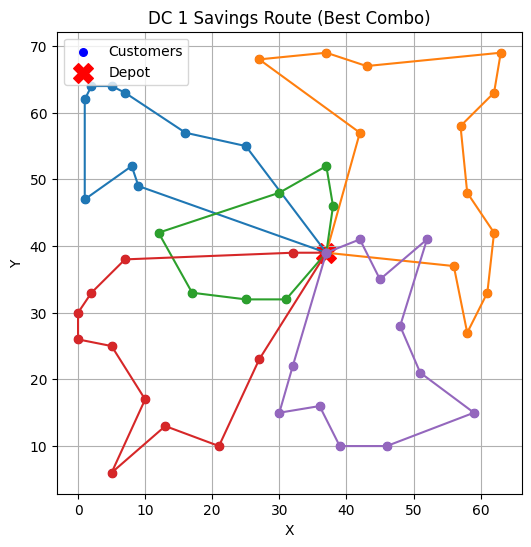

In [23]:
for dc_id, vrp_input in vrp_inputs_all[best_dc].items():
    result = savings_results[best_dc][dc_id]
    title = f"DC {dc_id} Savings Route (Best Combo)"
    plot_vrp_routes(vrp_input, result, title)


In [24]:
import numpy as np
import random

# 거리행렬
def compute_distance_matrix(coords):
    n = len(coords)
    dist = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dist[i][j] = np.hypot(coords[i][0] - coords[j][0], coords[i][1] - coords[j][1])
    return dist


# route splitting (방문 순서를 capacity에 맞게 루트로 나누기)
def split_into_routes(order, demands, capacity):
    routes = []
    current = [0]
    load = 0

    for cust in order:
        d = demands[cust]
        if load + d <= capacity:
            current.append(cust)
            load += d
        else:
            current.append(0)
            routes.append(current)
            current = [0, cust]
            load = d

    current.append(0)
    routes.append(current)
    return routes


# route 거리 계산 함수
def calculate_cost(routes, dist):
    total = 0
    for route in routes:
        for i in range(len(route)-1):
            total += dist[route[i]][route[i+1]]
    return total


In [25]:
# 초기 population 생성
def generate_population(num_customers, pop_size=40):
    base = list(range(1, num_customers+1))
    population = []
    for _ in range(pop_size):
        ind = base.copy()
        random.shuffle(ind)
        population.append(ind)
    return population


# crossover (부분 교차)
def crossover(parent1, parent2):
    size = len(parent1)
    a, b = sorted(random.sample(range(size), 2))

    child = [None] * size
    child[a:b] = parent1[a:b]  # 중간 부분 그대로

    fill = [x for x in parent2 if x not in child]  # 중복 제외
    idx = 0
    for i in range(size):
        if child[i] is None:
            child[i] = fill[idx]
            idx += 1
    return child


# mutation (swap)
def mutate(individual, mutation_rate=0.1):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(individual)-1)
            individual[i], individual[j] = individual[j], individual[i]
    return individual


In [26]:
def ga_vrp(vrp_input, generations=250, pop_size=40, mutation_rate=0.1):
    coords = vrp_input['coords']
    demands = vrp_input['demands']
    capacity = vrp_input['vehicle_capacity']
    num_customers = len(coords) - 1

    dist = compute_distance_matrix(coords)

    # 초기 population
    population = generate_population(num_customers, pop_size)

    best_cost = float('inf')
    best_routes = None

    for g in range(generations):
        new_pop = []

        for _ in range(pop_size):
            p1, p2 = random.sample(population, 2)

            child = crossover(p1, p2)
            child = mutate(child, mutation_rate)

            routes = split_into_routes(child, demands, capacity)
            cost = calculate_cost(routes, dist)

            if cost < best_cost:
                best_cost = cost
                best_routes = routes

            new_pop.append(child)

        population = new_pop

        # optional progress log
        if g % 50 == 0:
            print(f"[GA] Generation {g}: Best Cost = {best_cost:.2f}")

    return {
        "routes": best_routes,
        "total_distance": best_cost,
        "num_vehicles": len(best_routes),
    }


In [27]:
ga_results = {}

for dc_key, dc_dict in vrp_inputs_all.items():
    ga_results[dc_key] = {}
    print(f"\n==== GA 실행: DC 조합 {dc_key} ====")

    for dc_id, vrp_in in dc_dict.items():
        print(f" → DC {dc_id} GA 실행 중...")
        ga_results[dc_key][dc_id] = ga_vrp(vrp_in)



==== GA 실행: DC 조합 (0,) ====
 → DC 0 GA 실행 중...
[GA] Generation 0: Best Cost = 1655.85
[GA] Generation 50: Best Cost = 1564.73
[GA] Generation 100: Best Cost = 1551.18
[GA] Generation 150: Best Cost = 1523.07
[GA] Generation 200: Best Cost = 1523.07

==== GA 실행: DC 조합 (1,) ====
 → DC 1 GA 실행 중...
[GA] Generation 0: Best Cost = 1606.50
[GA] Generation 50: Best Cost = 1526.49
[GA] Generation 100: Best Cost = 1526.49
[GA] Generation 150: Best Cost = 1526.49
[GA] Generation 200: Best Cost = 1526.49

==== GA 실행: DC 조합 (2,) ====
 → DC 2 GA 실행 중...
[GA] Generation 0: Best Cost = 1591.75
[GA] Generation 50: Best Cost = 1571.62
[GA] Generation 100: Best Cost = 1503.36
[GA] Generation 150: Best Cost = 1503.36
[GA] Generation 200: Best Cost = 1503.36

==== GA 실행: DC 조합 (3,) ====
 → DC 3 GA 실행 중...
[GA] Generation 0: Best Cost = 1644.05
[GA] Generation 50: Best Cost = 1551.35
[GA] Generation 100: Best Cost = 1546.56
[GA] Generation 150: Best Cost = 1546.56
[GA] Generation 200: Best Cost = 1546.56


In [28]:
def plot_vrp_routes(vrp_input, result, title="VRP Route"):
    coords = vrp_input['coords']
    routes = result['routes']

    plt.figure(figsize=(6,6))

    # 고객 노드 plotting
    xs = [p[0] for p in coords]
    ys = [p[1] for p in coords]
    plt.scatter(xs[1:], ys[1:], c='blue', s=30, label="Customers")

    # depot 표시
    plt.scatter(xs[0], ys[0], c='red', s=200, marker='X', label='Depot')

    # routes 그리기
    for route in routes:
        rcoords = [coords[i] for i in route]
        rx = [p[0] for p in rcoords]
        ry = [p[1] for p in rcoords]
        plt.plot(rx, ry, '-o')

    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


In [29]:
def compute_cost_for_combo(dc_key, result_dict):
    facility_cost = sum(dc.loc[x, "COST"] for x in dc_key)
    routing_cost = sum(result_dict[d]["total_distance"] for d in result_dict)
    total = facility_cost + routing_cost

    return {
        "facility_cost": facility_cost,
        "routing_cost": routing_cost,
        "total_cost": total
    }


In [31]:
# GA 기반 총비용 계산 함수
def compute_total_cost(dc_key, result_dict):
    facility_cost = sum(dc.loc[x, "COST"] for x in dc_key)
    routing_cost = sum(result_dict[d]["total_distance"] for d in result_dict)
    total = facility_cost + routing_cost
    num_vehicles = sum(result_dict[d]["num_vehicles"] for d in result_dict)

    return {
        "facility_cost": facility_cost,
        "routing_cost": routing_cost,
        "total_cost": total,
        "num_facilities": len(dc_key),
        "num_vehicles": num_vehicles
    }

# 모든 조합에 대해 비용 계산
ga_cost_summary = {}
for dc_key in ga_results:
    ga_cost_summary[dc_key] = compute_total_cost(dc_key, ga_results[dc_key])

# 최적 조합 찾기
best_ga = min(ga_cost_summary, key=lambda x: ga_cost_summary[x]["total_cost"])
best_info = ga_cost_summary[best_ga]

print("🔥 GA 기준 최적 DC 조합:", best_ga)
print("총 비용:", best_info["total_cost"])
print("총 거리:", best_info["routing_cost"])
print("DC 개수:", best_info["num_facilities"])
print("차량 수:", best_info["num_vehicles"])


🔥 GA 기준 최적 DC 조합: (0, 1, 2, 3)
총 비용: 897.1144656072329
총 거리: 737.1144656072329
DC 개수: 4
차량 수: 7


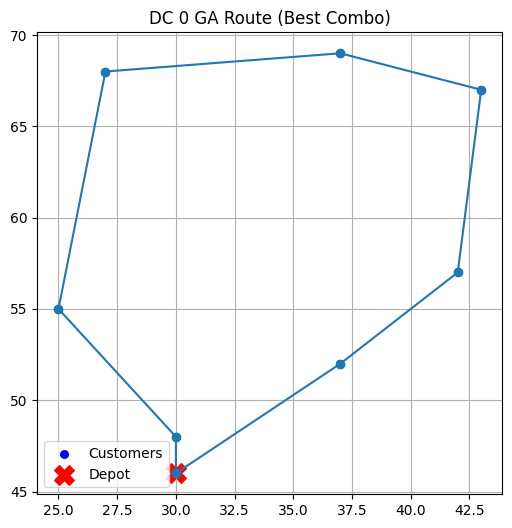

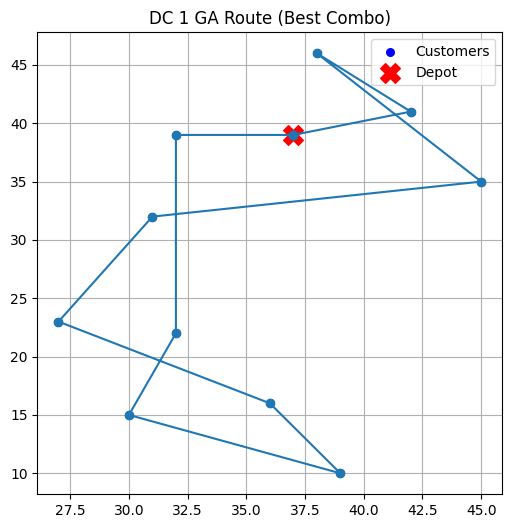

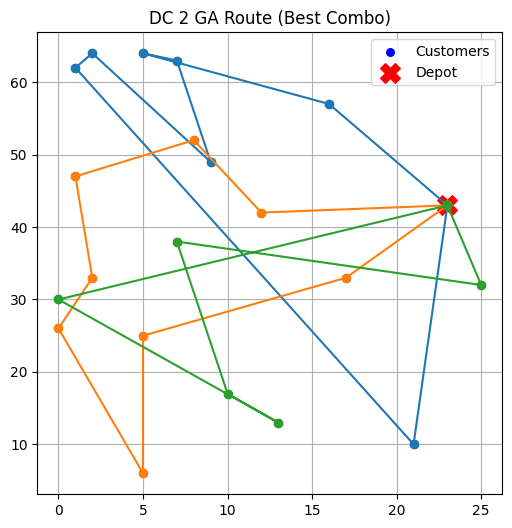

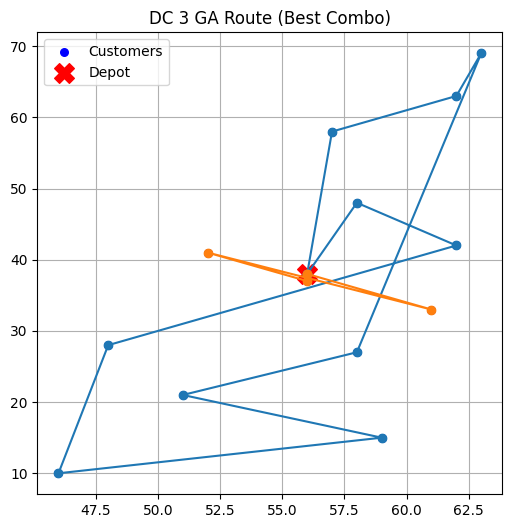

In [32]:
for dc_id, vrp_input in vrp_inputs_all[best_ga].items():
    result_ga = ga_results[best_ga][dc_id]
    plot_vrp_routes(vrp_input, result_ga, f"DC {dc_id} GA Route (Best Combo)")
